In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   # for heatmap
from my_functions import *



In [2]:
plt.style.use("seaborn-v0_8-darkgrid")

In [3]:
# Load the data
data = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data.head(50)

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO
0,79.0,BARBOSA,03/01/2015,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
1,79.0,BARBOSA,07/01/2015,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
2,79.0,BARBOSA,04/01/2015,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA
3,79.0,BARBOSA,05/01/2015,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
4,79.0,BARBOSA,11/01/2015,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
5,79.0,BARBOSA,06/01/2015,11:50:00 PM,MARTES,CHOQUE,BELLO DON MATIAS KM 23+200,DAÑOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
6,79.0,BARBOSA,06/01/2015,06:30:00 AM,MARTES,CHOQUE,VIA HATILLO BELLO KM 18+00 BARBOSA,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
7,79.0,BARBOSA,10/01/2015,01:00:00 PM,SABADO,ATROPELLO,HSVP BARBOSA CALLE 13 CRA 15,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
8,79.0,BARBOSA,08/01/2015,06:00:00 PM,JUEVES,CHOQUE,BELLO DONMATIAS KM 34+050,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
9,79.0,BARBOSA,10/01/2015,04:30:00 PM,SABADO,CHOQUE,BARBOSA CISNEROS KM 14+300,DAÑOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203450 entries, 0 to 203449
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COD_MUNICIPIO       203435 non-null  float64
 1   MUNICIPIO           203435 non-null  object 
 2   FECHA               203435 non-null  object 
 3   HORA                203435 non-null  object 
 4   DÍA DE LA SEMANA    203435 non-null  object 
 5   CLASE               203435 non-null  object 
 6   DIRECCIÓN           203435 non-null  object 
 7   GRAVEDAÑOSSADAÑOSS  203435 non-null  object 
 8   BARRIO              203385 non-null  object 
 9   COMUNA              203435 non-null  object 
 10  DISEÑO              203435 non-null  object 
dtypes: float64(1), object(10)
memory usage: 17.1+ MB


c:\Users\BRAYAN\Desktop\BootCamp\Prueba\Project_BootCamp\homework\my_functions.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip().str.lower()


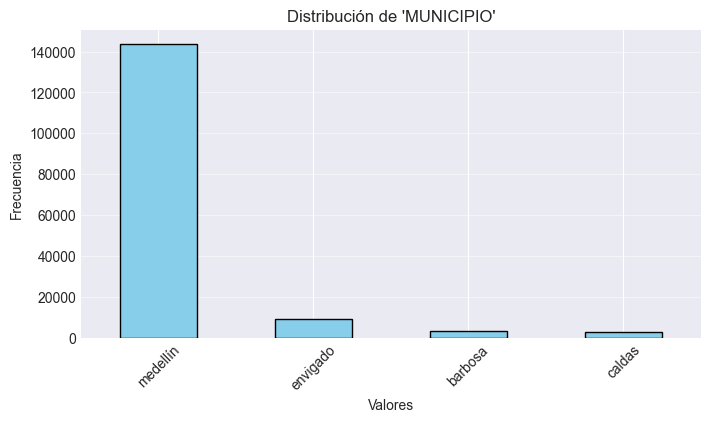

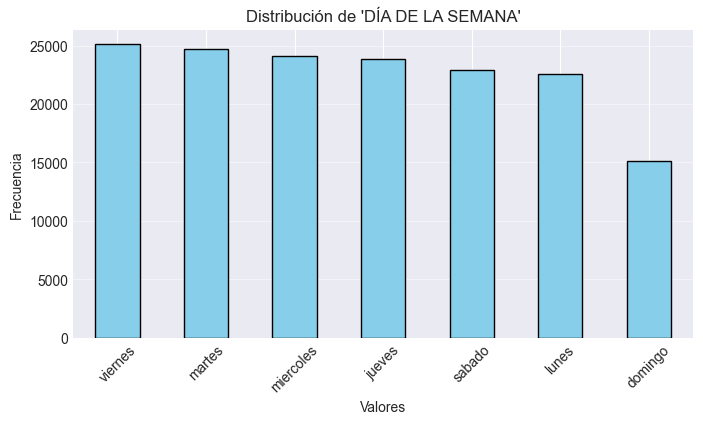

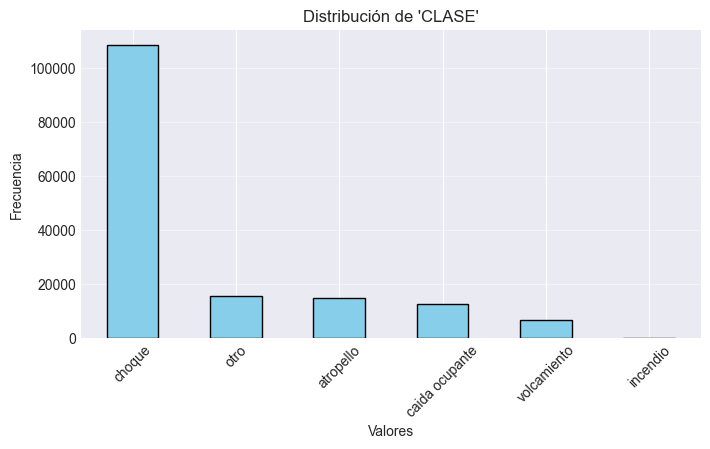

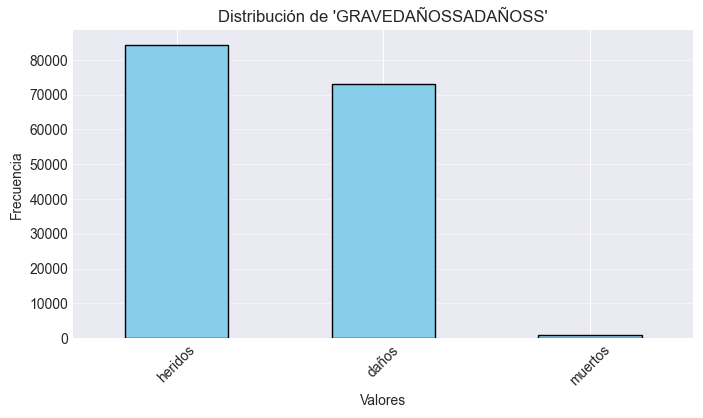

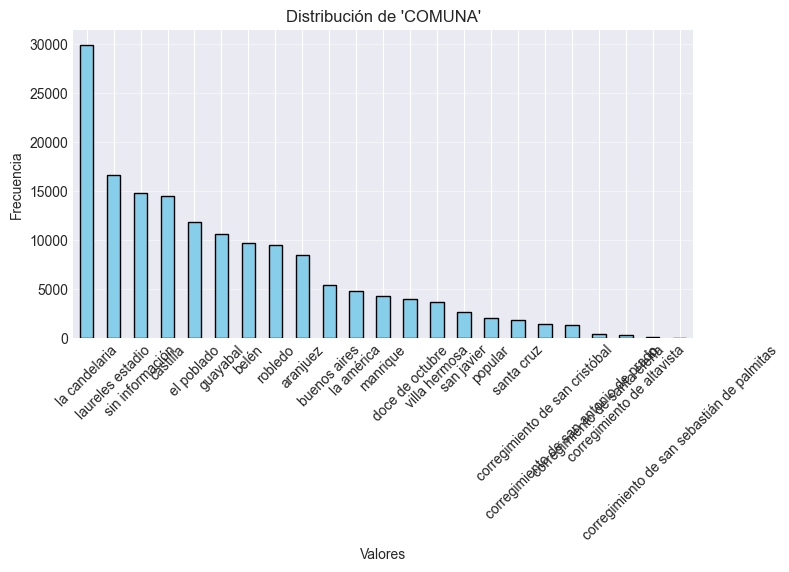

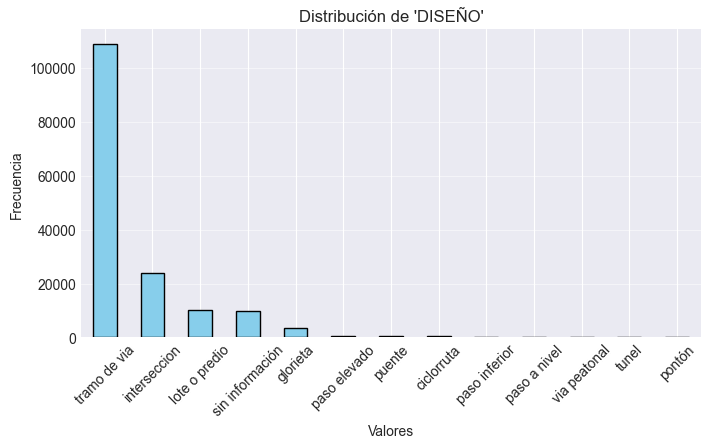

In [5]:
# Load the data
data = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data = clean_data(data)
#se eliminan los barrios sin información, ya que "BARRIO" es un parametro para el modelo
data = delete_barrios_sin_info(data)
graficar_histogramas(data)

ZONA MAPA

In [6]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [7]:
from geopy.geocoders import Nominatim
loc = Nominatim(user_agent="Geopy Library")

In [8]:
data.head()

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO
0,79.0,barbosa,03/01/2015,01:00:00 pm,sabado,choque,via bello hatillo km16+200,heridos,el hatillo,sin información,tramo de via
1,79.0,barbosa,07/01/2015,03:00:00 pm,miercoles,choque,hatillo-bello km 18+00,heridos,parque principal,sin información,tramo de via
2,79.0,barbosa,04/01/2015,04:01:00 am,domingo,choque,km 16+395 metros barbosa-hatillo,heridos,via el hatillo-cisneros,sin información,tramo de via
3,79.0,barbosa,05/01/2015,12:00:00 pm,lunes,choque,bello- don matias km 9+600,heridos,el hatillo,sin información,tramo de via
4,79.0,barbosa,11/01/2015,01:30:00 pm,domingo,choque,los abuelos,daños,parque principal,sin información,tramo de via


In [9]:
data_med = data[["MUNICIPIO","DIRECCIÓN","BARRIO","COMUNA"]]

data_med = data_med[data_med["MUNICIPIO"] == "medellín"]

conteo_accidentes = data_med.value_counts().reset_index()

conteo_accidentes.columns = list(data_med.columns) + ['#ACCIDENTES']

conteo_accidentes['DIRECCIÓN'] = conteo_accidentes['DIRECCIÓN'].str.replace(r'\bCR\b', 'carrera', regex=True).str.replace(r'\bCL\b', 'calle', regex=True)

conteo_accidentes.head(30)

,MUNICIPIO,DIRECCIÓN,BARRIO,COMUNA,#ACCIDENTES
0,medellín,cr 64 c cl 78,terminal de transporte,castilla,693
1,medellín,cr 64 c cl 67,caribe,castilla,416
2,medellín,cr 80 cl 65,facultad de minas u. nacional,robledo,389
3,medellín,cr 52 cl 10,campo amor,guayabal,382
4,medellín,cr 63 cl 44,naranjal,laureles estadio,366
5,medellín,cr 48 cl 10,manila,el poblado,359
6,medellín,cr 64 c cl 72,caribe,castilla,355
7,medellín,cr 57 cl 44,guayaquil,la candelaria,324
8,medellín,cr 65 cl 10,campo amor,guayabal,282
9,medellín,cr 65 cl 80,terminal de transporte,castilla,276


In [10]:
conteo_accidentes.shape[0]

24816

In [11]:
direcciones = []
accidentes = []
for i in range(100):
    direccion = f"{conteo_accidentes.loc[i]['DIRECCIÓN']}, {conteo_accidentes.loc[i]['BARRIO']}, {conteo_accidentes.loc[i]['COMUNA']}, {conteo_accidentes.loc[i]['MUNICIPIO']}"
    direcciones.append(direccion)
    accidentes.append(conteo_accidentes.loc[i]['#ACCIDENTES'])

In [12]:
direcciones = pd.DataFrame({
    "direcciones": direcciones,
    "lat": [None] * len(direcciones),
    "lon": [None] * len(direcciones),
    "num_accidentes":accidentes
})

In [13]:
direcciones.to_excel('direcciones.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'